# Placement Prediction

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

In [230]:
df = pd.read_csv('./content/placement.csv')

In [231]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


### Steps

0. Preprocess + EDA(Exploratory Data Analysis) + Feature Selection
1. Extract input and output cols
2. Scale the values (Bring all of them in a range)
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [233]:
# Pre-Processing
df = df.iloc[:,1:]

In [234]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


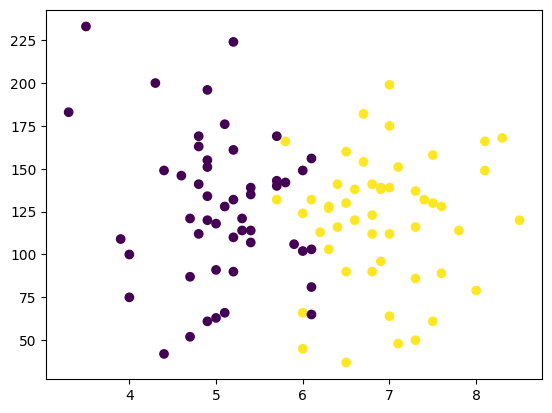

In [235]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])
# Yellow->placement done
# Blue -> Placement not done

### Logistic Regression
This finds a line between the two data values

In [236]:
# Two variables are there independent and dependent variables

X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [237]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [254]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [239]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.1) # here i am saying that 10 rows from the data will go for the testing

In [240]:
# print("----This is X-train----",X_train)
# print("----This is X_test----",X_test)
print("----This is Y_train----",Y_train)
print("----This is Y_test----",Y_test)

----This is Y_train---- 30    1
40    0
37    1
73    0
79    1
     ..
26    1
47    0
76    0
63    1
46    0
Name: placement, Length: 90, dtype: int64
----This is Y_test---- 97    1
24    0
18    0
42    1
39    0
20    1
74    1
44    1
92    0
84    0
Name: placement, dtype: int64


In [241]:
scaler = StandardScaler()

In [242]:
X_train = scaler.fit_transform(X_train)

In [243]:
X_train

array([[ 1.41765798e+00,  1.14531853e-01],
       [-9.71321835e-01,  2.63921227e-01],
       [ 1.86006165e+00,  6.37394662e-01],
       [-9.71321835e-01, -1.55364949e+00],
       [ 4.44369908e-01, -8.31600849e-01],
       [-7.05879633e-01, -8.31600849e-01],
       [ 1.96623853e-03, -1.42915834e+00],
       [ 2.67408441e-01, -5.07923872e-01],
       [-1.05980257e+00, -2.83839811e-01],
       [-2.63475963e-01,  2.14124769e-01],
       [-5.28918165e-01, -4.08330956e-01],
       [-7.05879633e-01,  2.14124769e-01],
       [ 1.32917725e+00,  1.64328311e-01],
       [-2.63475963e-01,  4.13310601e-01],
       [ 2.21398459e+00, -8.46539786e-02],
       [-8.65144955e-02, -4.33229185e-01],
       [ 7.98292844e-01,  3.88412372e-01],
       [ 1.15221578e+00,  3.38615914e-01],
       [ 7.09812110e-01, -8.31600849e-01],
       [ 9.04469725e-02,  2.14124769e-01],
       [ 1.77158092e+00, -1.10548137e+00],
       [ 9.04469725e-02, -1.45405657e+00],
       [ 9.75254312e-01, -1.87732647e+00],
       [ 7.

In [244]:
X_test = scaler.transform(X_test)

In [245]:
clf = LogisticRegression()

In [246]:
clf.fit(X_train,Y_train) # training the model

LogisticRegression()

In [247]:
Y_predict = clf.predict(X_test)
Y_predict

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
Y_test

97    1
24    0
18    0
42    1
39    0
20    1
74    1
44    1
92    0
84    0
Name: placement, dtype: int64

In [249]:
accuracy_score(Y_predict,Y_test)

1.0

<Axes: >

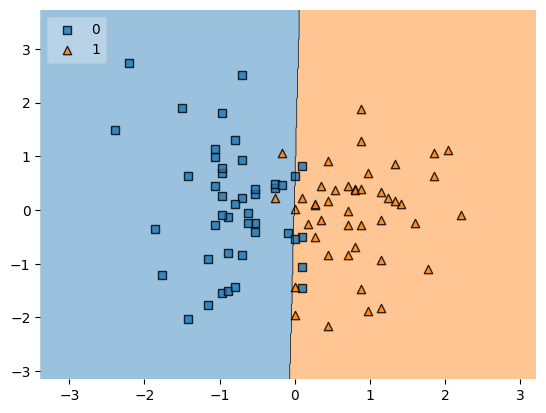

In [250]:
plot_decision_regions(X_train,Y_train.values,clf= clf,legend=2) # converting these into the numpy array so that we can plot the given bellow figure

In [253]:
pickle.dump(clf,open('model.pkl','wb'))